# Normal Distribution

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



In [12]:
# Load previously saved df
df = pd.read_csv('../data/online_retail_cleaned_up.csv')

# and take 20k samples (to speed things up)
samples = df.UnitPrice.sample(20000)

# Note at this point samples is a Series 
# samples.head()

# Build a new dataframe 
data = pd.DataFrame( data = samples, columns = ['UnitPrice']  )

# data.head()


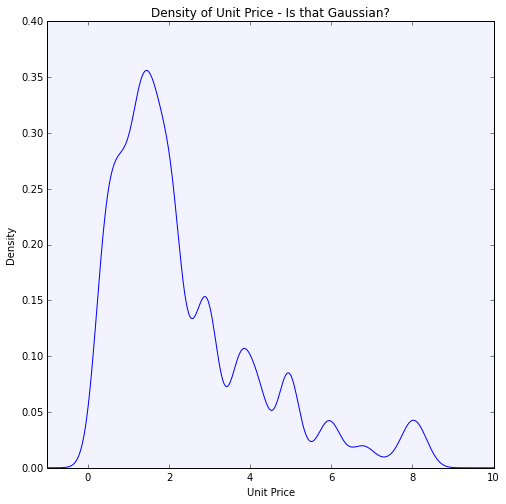

In [13]:
# plot the UnitPrice Density

data.UnitPrice.plot(kind="density", xlim=(-1, 10), figsize=(8,8))
plt.xlabel("Unit Price")
plt.title("Density of Unit Price - Is that Gaussian?")

# Transform the data to correct skewness

1. Take the log to correct left skewness

        UnitPrice  LogUnitPrice
26838        0.29     -1.237874
156249       4.95      1.599388
103687       2.10      0.741937
172481       1.65      0.500775
180774       7.95      2.073172


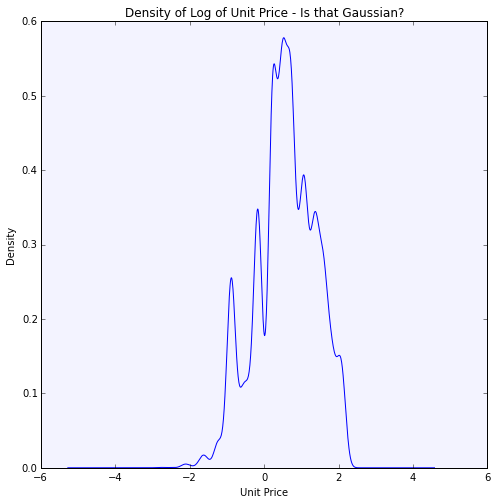

In [18]:
# log of Unit Price
data['LogUnitPrice'] = np.log(data.UnitPrice)
print(data.head())
data.LogUnitPrice.plot(kind="density",  figsize=(8,8))
plt.xlabel("Unit Price")
plt.title("Density of Log of Unit Price - Is that Gaussian?")

# Box Cox Transformation


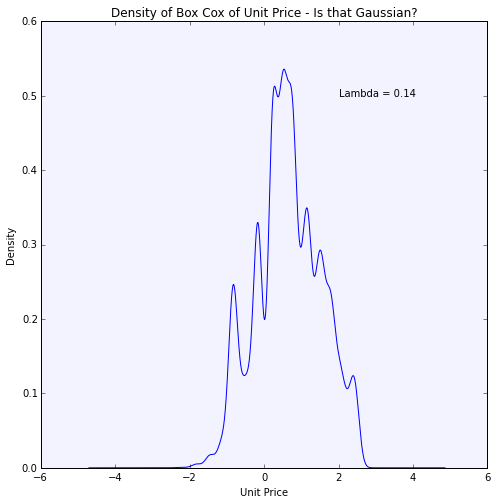

In [19]:
from scipy import stats

boxcox_samples = stats.boxcox(samples.values)[0]
lambdaa = stats.boxcox(samples.values)[1]

# add to the DataFrame
data['BoxCoxUnitPrice'] = boxcox_samples
data['BoxCoxUnitPrice'].plot(kind="density",  figsize=(8,8))

# and plot
plt.xlabel("Unit Price")
plt.title("Density of Box Cox of Unit Price - Is that Gaussian?")
plt.annotate( "Lambda = %0.2f " % lambdaa, xy=(2, 0.5))


# Compare

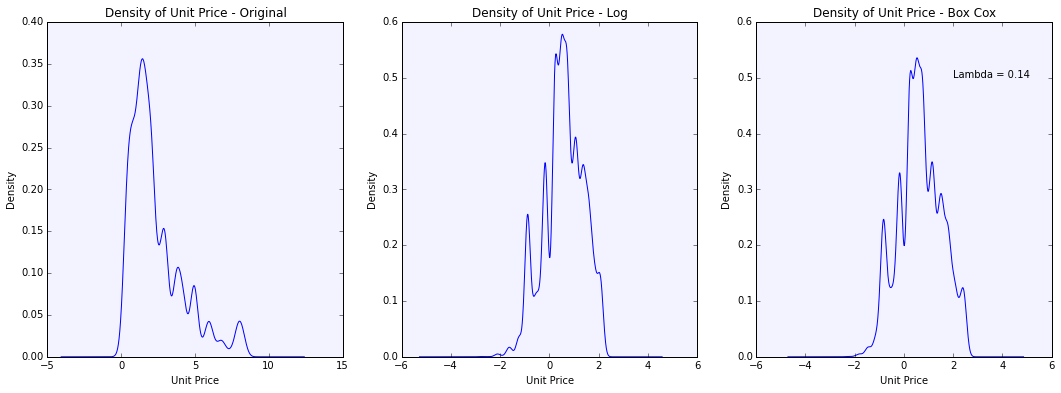

In [22]:
fig, ax = plt.subplots(figsize=(18, 6))
plt.subplot(131)
plt.xlabel("Unit Price")
plt.title("Density of Unit Price - Original")
data['UnitPrice'].plot(kind="density")

plt.subplot(132)
plt.xlabel("Unit Price")
plt.title("Density of Unit Price - Log")
data['LogUnitPrice'].plot(kind="density")

plt.subplot(133)
plt.xlabel("Unit Price")
plt.title("Density of Unit Price - Box Cox")
plt.annotate( "Lambda = %0.2f " % lambdaa, xy=(2, 0.5))
data['BoxCoxUnitPrice'].plot(kind="density")


# So which is better?

Which is closer to the Gaussian distribution ?

Calculate with [scipy.stats.skew](http://nullege.com/codes/search/scipy.stats.skew)

In [23]:
from scipy.stats import skew

skew_original = skew(samples)
print("Skew factor for UnitPrice: %0.2f"% skew_original)

skew_log = skew(log_data)
print("Skew factor for UnitPrice after Log transform: %0.2f"% skew_log)

skew_boxcox = skew(boxcox_samples)
print("Skew factor for UnitPrice after BOX COX transform: %0.2f"% skew_boxcox)


Skew factor for UnitPrice: 1.36
Skew factor for UnitPrice after Log transform: 0.36
Skew factor for UnitPrice after BOX COX transform: -0.02
